<h1 align="center">Data Visualization - Infographic</h1>

<a id="0"></a> <br>
## Table of Contents
1. [Load the Libraries](#1)
2. [Load Data](#2)
3. [Data Overview](#3)
4. [How do We Realize the Goal of the Project?](#4)
5. [Visualization 1: Average Customer Satisfaction of Four Teams](#5)
    1. [Data Preparation](#6)
    2. [Bar Plot](#7)
    3. [Save Bar Plot for Infographic](#8)
6. [Visualization 2: Number of Problems Resolved by Specialists](#9)
    1. [Data Preparation](#10)
    2. [Company-wide Average Problem Resolved Rate](#11)
    3. [Tree Map](#12)
    4. [Save Tree Map for Infographic](#13)
7. [Visualization 3: Comparison of Ticket Processing Time for Four Teams](#14)
    1. [Data Preparation](#15)
    2. [Box Plot](#16)
    3. [Save Box Plot for Infographic](#17)
8. [Infographic - All in One](#18)
9. [References](#19)

<a id="1"></a>
## 1. Load the Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
from matplotlib import colormaps

import seaborn as sns
import squarify

import time
import math

<a id="2"></a>
## 2. Load Data

In [2]:
# Define Constants
DATASET_NAME_TICKETS = "dataset.csv"

In [3]:
df = pd.read_csv("./" + DATASET_NAME_TICKETS)

<a id="3"></a>
## 3. Data Overview

In [4]:
df.head()

,ticket_type,creation_date,view_date,action_date,customer_satisfaction,customer_problem_resolved,user_actioned,user_team
0,live_chat,2023-06-02 08:35:00.000000000,2023-06-02 08:35:00.000000000,2023-06-02 08:52:00.000000000,2,False,8ac38c,green
1,email,2023-06-02 08:14:00.000000000,2023-06-02 08:56:00.000000000,2023-06-02 09:25:00.000000000,3,True,8ac38c,green
2,email,2023-06-02 06:03:00.000000000,2023-06-02 09:29:00.000000000,2023-06-02 09:56:00.000000000,5,True,8ac38c,green
3,web_form,2023-06-02 06:42:00.000000000,2023-06-02 09:58:00.000000000,2023-06-02 10:20:00.000000000,2,False,8ac38c,green
4,email,2023-06-02 09:24:00.000000000,2023-06-02 10:24:00.000000000,2023-06-02 10:46:00.000000000,5,True,8ac38c,green


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25562 entries, 0 to 25561
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ticket_type                25562 non-null  object
 1   creation_date              25562 non-null  object
 2   view_date                  25562 non-null  object
 3   action_date                25562 non-null  object
 4   customer_satisfaction      25562 non-null  int64 
 5   customer_problem_resolved  25562 non-null  bool  
 6   user_actioned              25562 non-null  object
 7   user_team                  25562 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 1.4+ MB


In [6]:
df.describe()

,customer_satisfaction
count,25562.000000
mean,2.778734
std,1.658829
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


<a id="4"></a>
## 4. How do We Realize the Goal of the Project?

<b>The goal of the project is to discuss how efficient the company's customer support is. We realize this from THREE aspects.</b>

- <b>Are the customers satisfied?</b>

First, as the old saying goes, the customer is always right. Therefore, we visualize customer feedback for individual teams. After understanding how the customers feel about the four teams, we try to find the reasons behind different levels of satisfaction. This leads us to the next two analyses.

- <b>Are the specialists qualified?</b>

Secondly, one main concern of the customers is whether their problems have been resolved. This can be used to evaluate the professional quality of our specialists. As a result, we then visualize the problem resolved rate of the individual team and each specialist belongs to the team.

- <b>Are the services efficient?</b>

Finally, we investigate the efficiency of customer support. The customer support team should address customers' problems promptly. Service efficiency is also directly related to customer satisfaction.

<a id="5"></a>
## 5. Visualization 1: Average Customer Satisfaction of Four Teams

<a id="6"></a>
### 5.1 Data Preparation

In [7]:
d_team = [df[df["user_team"] == "green"]["customer_satisfaction"], 
          df[df["user_team"] == "red"]["customer_satisfaction"], 
          df[df["user_team"] == "blue"]["customer_satisfaction"], 
          df[df["user_team"] == "orange"]["customer_satisfaction"]]

<a id="7"></a>
### 5.2 Bar Plot

In [8]:
df.describe()

,customer_satisfaction
count,25562.000000
mean,2.778734
std,1.658829
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


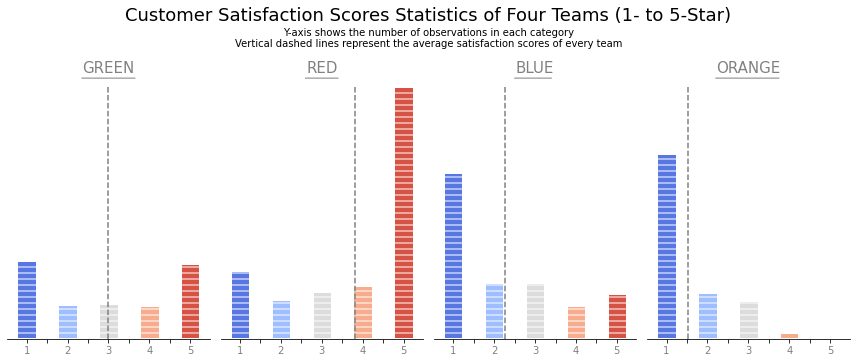

In [9]:
# Define constants for the figure
title_list = ["GREEN", "RED", "BLUE", "ORANGE"]
x_anno_min_list = [2.3, 2.55, 2.45, 2.15]
x_anno_max_list = [3.7, 3.45, 3.45, 3.8]
color_list = ["green", "red", "blue", "orange"]
d_index = 0

# Define object-oriented interface
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

# Set the super title of the figure
fig.suptitle("Customer Satisfaction Scores Statistics of Four Teams (1- to 5-Star)", y=1, fontsize=18)
fig.text(0.5, 
         0.92, 
         "Y-axis shows the number of observations in each category", 
         transform=fig.transFigure, 
         horizontalalignment="center"
        )
fig.text(0.5, 
         0.89, 
         "Vertical dashed lines represent the average satisfaction scores of every team", 
         transform=fig.transFigure, 
         horizontalalignment="center"
        )

for ax in axes:
    # Plot bar chart
    bin_container = ax.bar(
        x=[1, 2, 3, 4, 5], 
        height=d_team[d_index].value_counts().sort_index().to_list(), 
        width=0.5, 
        edgecolor="white", 
        linewidth=3
    )
    
    # Define color map
    cmap = plt.get_cmap("coolwarm")
    
    lim = ax.get_xlim() + ax.get_ylim()
    y_min, y_max = ax.get_ylim()
    x_min, x_max = ax.get_xlim()
    
    # Normalization the data to pass to color map
    bin_center = np.array([1, 2, 3, 4, 5])
    bin_center_norm = (bin_center - min(bin_center)) / (max(bin_center) - min(bin_center)) * (0.9 - 0.1) + 0.1
    
    i = 0
    for bar in bin_container:
        # Change bars' appearance
        bar.set_zorder(1)
        bar.set_facecolor(cmap(bin_center_norm[i]))
        bar.set_hatch("--")
        bar.set_linewidth(3)
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        if (h == 0):
            continue
            
        i += 1

    # Calculate average satisfaction score for each team
    sum_satisfaction = 0
    for i in range(len(d_team[d_index].value_counts().sort_index().to_list())):
        sum_satisfaction += d_team[d_index].value_counts().sort_index().to_list()[i] * (i + 1)
    average_satisfaction = sum_satisfaction / sum(d_team[d_index].value_counts().sort_index().to_list())
    
    d_index += 1
    
    # Draw vertical dashed lines at average satisfaction score of each team
    ax.axvline(x=average_satisfaction, ymax=0.86, color="grey", ls="--")
    
#     ax.set_xlim(0, width - 1)
    ax.set_ylim(0, 5500)

    # Set y-axis tick labels
    ax.set_yticks([])
    ax.set_ylabel("")

    # Set left, right, and top spines to invisible
    ax.spines[["left", "right", "top"]].set_visible(False)
    
    ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
    # ax.set_xticklabels(["1.0", "", "2.0", "", "3.0", "", "4.0", "", "5.0"], color="grey")
    ax.set_xticklabels(["1", "", "2", "", "3", "", "4", "", "5"], color="grey")

    # Set subplot title
    ax.set_title(title_list[d_index - 1], fontsize=15, color="grey", y=0.89)
    
    # Draw underlines for each team name
    ax.annotate("", 
                xy=(x_anno_min_list[d_index - 1], 4900), 
                xycoords="data", 
                xytext=(x_anno_max_list[d_index - 1], 4900), 
                arrowprops=dict(arrowstyle="-", color="grey")
               )

# Get ready to save the figure
fig.tight_layout()

# Save image
# fig.savefig("bar.png", format="png", dpi=1200)

<a id="5"></a>
### 5.3 Save Bar Plot for Infographic

In [10]:
fig1 = fig

<a id="9"></a>
## 6. Visualization 2: Number of Problems Resolved by Specialists

<a id="10"></a>
### 6.1 Data Preparation

In [11]:
df_resolved_t_f = df.groupby(["user_team", "customer_problem_resolved"])["customer_problem_resolved"].count().reset_index(name="count")

In [12]:
df_resolved_t = df_resolved_t_f[df_resolved_t_f["customer_problem_resolved"] == True]

In [13]:
df_resolved_t_blue = df[df["user_team"] == "blue"].groupby(["user_actioned", "customer_problem_resolved"])["customer_problem_resolved"].count().reset_index(name="count")
df_resolved_t_green = df[df["user_team"] == "green"].groupby(["user_actioned", "customer_problem_resolved"])["customer_problem_resolved"].count().reset_index(name="count")
df_resolved_t_orange = df[df["user_team"] == "orange"].groupby(["user_actioned", "customer_problem_resolved"])["customer_problem_resolved"].count().reset_index(name="count")
df_resolved_t_red = df[df["user_team"] == "red"].groupby(["user_actioned", "customer_problem_resolved"])["customer_problem_resolved"].count().reset_index(name="count")

<a id="11"></a>
### 6.2 Company-wide Average Problem Resolved Rate

In [14]:
print("The company-wide average problem resolved rate is: ", 
      int(
          round(
              (
                  df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
              ) / (df["customer_problem_resolved"].count()), 
              2
          ) * 100
      ), "%"
     )

The company-wide average problem resolved rate is:  53 %


<a id="12"></a>
### 6.3 Tree Map

In [15]:
# The function is slightly modified based on the squarify library:
# https://github.com/laserson/squarify/tree/master

def pad_rectangle(rect):
    if rect["dx"] > 12:
        rect["x"] += 6
        rect["dx"] -= 12
    if rect["dy"] > 12:
        rect["y"] += 6
        rect["dy"] -= 12

def myPlot(values, width, height, x, y, color, label, linewidth, ax, pad, text_kwargs):
    
    if text_kwargs == None:
        text_kwargs = {}
        
    normed = squarify.normalize_sizes(values, width, height)

    rects = squarify.squarify(normed, x, y, width, height)
    
    if pad:
        for rect in rects:
            pad_rectangle(rect)
        
    x = [rect["x"] for rect in rects]
    y = [rect["y"] for rect in rects]
    dx = [rect["dx"] for rect in rects]
    dy = [rect["dy"] for rect in rects]
    
    # Instead of padding the rectangles, I used edge attribute to delineate each rectangle by white lines
    sub_bar = ax.bar(
        x, 
        dy, 
        width=dx, 
        bottom=y, 
        color=color, 
        label=label, 
        align="edge", 
        edgecolor="black", 
        linewidth=linewidth
    )
    
    # Label each rectangle in the centre of the rectangle
    if label is not None:
        va = "center" if value is None else "bottom"
        for l, r in zip(label, rects):
            x, y, dx, dy = r["x"], r["y"], r["dx"], r["dy"]

            if ("Orange" in l):
                text_kwargs["fontsize"] = 12    
                ax.text(x + dx / 2, 
                        y + dy / 2, 
                        l, 
                        va=va, 
                        ha="center", 
                        bbox=dict(facecolor="none", 
                                  edgecolor="darkorange", 
                                  boxstyle="round", 
                                  linewidth=3
                                 ), 
                        **text_kwargs
                       )
            elif ("Green" in l):
                ax.text(x + dx / 2, 
                        y + dy / 2, 
                        l, 
                        va=va, 
                        ha="center", 
                        bbox=dict(facecolor="none", 
                                  edgecolor="darkseagreen", 
                                  boxstyle="round", 
                                  linewidth=3
                                 ), 
                        **text_kwargs
                       )
            elif ("Blue" in l):
                ax.text(x + dx / 2, 
                        y + dy / 2, 
                        l, 
                        va=va, 
                        ha="center", 
                        bbox=dict(facecolor="none", 
                                  edgecolor="cornflowerblue", 
                                  boxstyle="round", 
                                  linewidth=3
                                 ), 
                        **text_kwargs
                       )
            else:
                ax.text(x + dx / 2, 
                        y + dy / 2, 
                        l, 
                        va=va, 
                        ha="center", 
                        bbox=dict(facecolor="none", 
                                  edgecolor="#801900", 
                                  boxstyle="round", 
                                  linewidth=3
                                 ), 
                        **text_kwargs
                       )

    return normed, rects, sub_bar

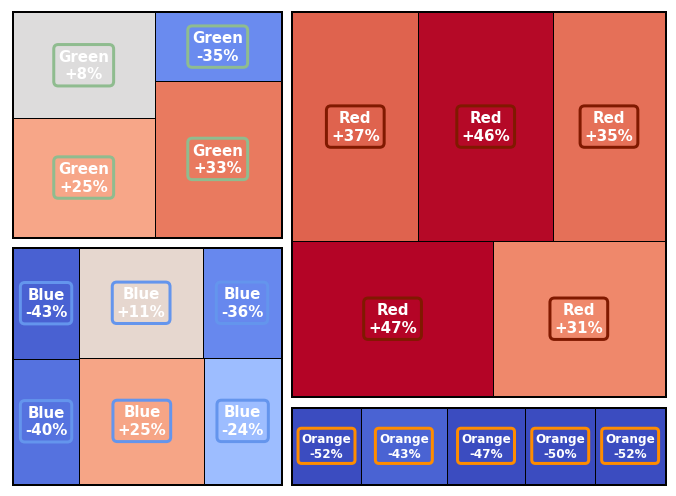

In [16]:
# Define object-oriented interface
fig, ax = plt.subplots(figsize=(9.5, 7))

# Define parameters for squarify
x = 0.
y = 0.
width = 700.
height = 515.
color = "black"
label = []
bar_kwargs = {}
text_kwargs = {"color": "white"}
value = None

# Get total value of each category
values = df_resolved_t["count"].to_numpy()

# Plot the higher level tree map for the four teams
normed_all, rects_all, bars = myPlot(values, width, height, x, y, color, label, 3, ax, True, text_kwargs)

low_level_data = [df_resolved_t_blue, df_resolved_t_green, df_resolved_t_orange, df_resolved_t_red]

color_list = ["Blue", "Green", "Orange", "Red"]
cmap1 = matplotlib.colormaps["coolwarm"]
cmap2 = matplotlib.colormaps["coolwarm_r"]

t_min = 0.5
t_max = 1.0

deviation_list_pos = []
deviation_list_neg = []

for i in range(len(rects_all)):
    for user_name in low_level_data[i]["user_actioned"].unique():
        # Number of problems resolved
        true_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == True
        )]["count"].to_numpy()[0]
        
        # Number of problems remaining
        false_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == False
        )]["count"].to_numpy()[0]
        
        # Check whether a group's problem resolved rate is above the average
        deviation = (true_count / (true_count + false_count)) - (
            df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
        ) / (df["customer_problem_resolved"].count())

        if (deviation >= 0):
            deviation_list_pos.append(deviation)
        else:
            deviation_list_neg.append(deviation)

# Min and Max values are used for normalization
deviation_list_pos_max = max(deviation_list_pos)
deviation_list_pos_min = min(deviation_list_pos)

deviation_list_neg_max = max([(-x) for x in deviation_list_neg])
deviation_list_neg_min = min([(-x) for x in deviation_list_neg])
    
for i in range(len(rects_all)):
    # Calculate each specialist's problem resolved rate to pass to the color map.
    color = []

    for user_name in low_level_data[i]["user_actioned"].unique():
        # Number of problems resolved
        true_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == True
        )]["count"].to_numpy()[0]
        
        # Number of problems remaining
        false_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == False
        )]["count"].to_numpy()[0]
        
        # Check whether a group's problem resolved rate is above the average
        deviation = (true_count / (true_count + false_count)) - (
            df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
        ) / (df["customer_problem_resolved"].count())
        
        # Normalize the value before passing to the color map (Min-Max normalization)
        if (deviation >= 0):
            color.append(cmap1((
                deviation - deviation_list_pos_min
            ) / (deviation_list_pos_max - deviation_list_pos_min) * (t_max - t_min) + t_min))
        else:
            color.append(cmap2((
                (-deviation) - deviation_list_pos_min
            ) / (deviation_list_pos_max - deviation_list_pos_min) * (t_max - t_min) + t_min))

    text_kwargs = {"color": "white", "weight": "heavy", "fontsize": 15}

    my_label = []
    
    # Calculate each specialist's problem resolved rate to pass to labels.
    for user_name in low_level_data[i]["user_actioned"].unique():
        # Number of problems resolved
        true_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == True
        )]["count"].to_numpy()[0]
        
        # Number of problems remaining
        false_count = low_level_data[i][(
            low_level_data[i]["user_actioned"] == user_name
        ) & (
            low_level_data[i]["customer_problem_resolved"] == False
        )]["count"].to_numpy()[0]

        # Check whether a group's problem resolved rate is above the average
        deviation = (true_count / (true_count + false_count)) - (
            df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
        ) / (df["customer_problem_resolved"].count())
    
        # Re-format label content
        if (deviation >= 0):
            diff = ((true_count / (true_count + false_count)) - (
                df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
            ) / (df["customer_problem_resolved"].count())) / ((
                df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
            ) / (df["customer_problem_resolved"].count()))
            
            my_label.append(color_list[i] + "\n" + "+" + str(int(round(diff, 2) * 100)) + "%")
        else:
            diff = ((
                df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
            ) / (df["customer_problem_resolved"].count()) - (
                true_count / (true_count + false_count)
            )) / ((
                df[df["customer_problem_resolved"] == True]["customer_problem_resolved"].count()
            ) / (df["customer_problem_resolved"].count()))
            
            my_label.append(color_list[i] + "\n" + "-" + str(int(round(diff, 2) * 100)) + "%")

    #Plot the lower level tree map for all specialists
    _, _, _ = myPlot(low_level_data[i][low_level_data[i]["customer_problem_resolved"] == True]["count"], 
                     rects_all[i]["dx"], 
                     rects_all[i]["dy"], 
                     rects_all[i]["x"], 
                     rects_all[i]["y"], 
                     color, 
                     my_label, 
                     1, 
                     ax, 
                     False,
                     text_kwargs
                    )

for b in bars:
    b.set_linewidth(3)

# Set x-limits and y-limits
ax.set_xlim(0, width - 1)
ax.set_ylim(1, height)

# Remove unnecessary tick marks or labels
ax.tick_params(left=False, bottom=False)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

# Set spines to invisible
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)

# Get ready to save the figure
fig.tight_layout()

# Save image
# fig.savefig("tree.png", format="png", dpi=1200)

<a id="13"></a>
### 6.4 Save Tree Map for Infographic

In [17]:
fig2 = fig

<a id="14"></a>
## 7. Visualization 3: Comparison of Ticket Processing Time for Four Teams

<a id="15"></a>
### 7.1 Data Preparation

In [18]:
df_time = df
df_time["delt"] = (pd.to_datetime(df_time["action_date"]) - pd.to_datetime(df_time["creation_date"])).dt.total_seconds().astype(int)

<a id="16"></a>
### 7.2 Box Plot

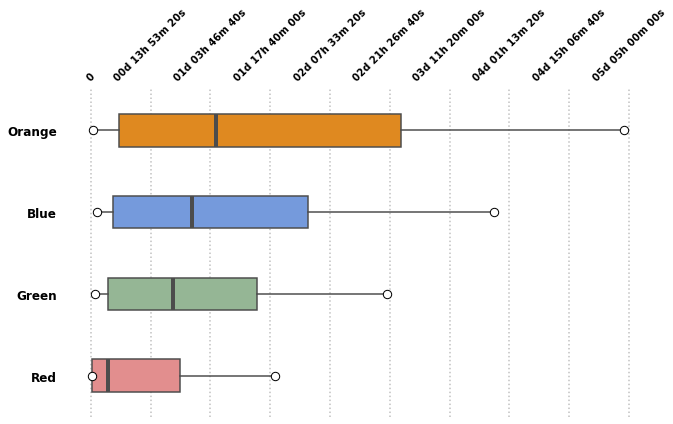

In [19]:
# Define object-oriented interface
fig, ax = plt.subplots(figsize=(9.5, 6))

# Define color palette
my_pal = {"green": "darkseagreen", "blue": "cornflowerblue", "red":"lightcoral", "orange": "darkorange"}

# Draw box plot
sns.boxplot(data=df_time, 
            x="delt", 
            y="user_team", 
            showfliers=False, 
            whis=(10, 90), 
            width=0.4, 
            order=["orange", "blue", "green", "red"], 
            medianprops={"linewidth": 4, "solid_capstyle": "butt"}, 
            palette=my_pal, 
            capprops = {"linestyle": "solid", "linewidth": 0}
           )

# Draw vertical dotted white lines
ax.axvline(x=0, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=50000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=100000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=150000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=200000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=250000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=300000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=350000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=400000, color="silver", ls="dotted", zorder=-10)
ax.axvline(x=450000, color="silver", ls="dotted", zorder=-10)

# Set x-axis
# - Set x-axis to the top
ax.xaxis.tick_top()
ax.set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
# - Set specified x-tick labels
ax.set_xticklabels(["0", 
                    "00d 13h 53m 20s", 
                    "01d 03h 46m 40s", 
                    "01d 17h 40m 00s", 
                    "02d 07h 33m 20s", 
                    "02d 21h 26m 40s", 
                    "03d 11h 20m 00s", 
                    "04d 01h 13m 20s", 
                    "04d 15h 06m 40s", 
                    "05d 05h 00m 00s"
                   ], 
                   weight="heavy", 
                   rotation=45
                  )
# - Set x-axis tick markers to invisible
ax.tick_params(axis="x",top=False)

# Set y-axis
# - Set y-axis tick markers to invisible
ax.tick_params(left = False) 
# - Set specified y-tick labels
ax.set_yticklabels(["Orange", "Blue", "Green", "Red"], weight="heavy", fontsize=12)

# Set left, right, bottom and top spines to invisible
ax.spines[["left", "right", "bottom", "top"]].set_visible(False)

# Set x and y axes labels to invisible
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# Replace the horizontal lines at the ends of the whiskers with circles
ax.scatter(np.percentile(df_time[df["user_team"] == "orange"]["delt"].to_numpy(), 10), 
           0, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )
ax.scatter(np.percentile(df_time[df["user_team"] == "orange"]["delt"].to_numpy(), 90), 
           0, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )

ax.scatter(np.percentile(df_time[df["user_team"] == "blue"]["delt"].to_numpy(), 10), 
           1, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )
ax.scatter(np.percentile(df_time[df["user_team"] == "blue"]["delt"].to_numpy(), 90), 
           1, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )

ax.scatter(np.percentile(df_time[df["user_team"] == "green"]["delt"].to_numpy(), 10), 
           2, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )
ax.scatter(np.percentile(df_time[df["user_team"] == "green"]["delt"].to_numpy(), 90), 
           2, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )

ax.scatter(np.percentile(df_time[df["user_team"] == "red"]["delt"].to_numpy(), 10), 
           3, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )
ax.scatter(np.percentile(df_time[df["user_team"] == "red"]["delt"].to_numpy(), 90), 
           3, 
           facecolor="white", 
           edgecolors="black", 
           s=70, 
           linewidth=1, 
           zorder=5
          )

# Get ready to save the figure
fig.tight_layout()

# Save image
# fig.savefig("box.png", format="png", dpi=1200)

<a id="17"></a>
### 7.3 Save Box Plot for Infographic

In [20]:
fig3 = fig

<a id="18"></a>
## 8. Infographic - All in One

In [21]:
# Combine multiple matplotlib figures together:
# - Render the figures to arrays using the "AGG" backend.
# - Then save the arrays and reset to the normal Matplotlib backend to plot the results.
# Reference: https://stackoverflow.com/questions/70083434/combine-two-matplotlib-figures-side-by-side-high-quality
backend = matplotlib.get_backend()
matplotlib.use('agg')

c1 = fig1.canvas
c2 = fig2.canvas
c3 = fig3.canvas

c1.draw()
c2.draw()
c3.draw()

a1 = np.array(c1.buffer_rgba())
a2 = np.array(c2.buffer_rgba())
a3 = np.array(c3.buffer_rgba())

matplotlib.use(backend)

# Set figure size to 12 inches by 21 inches
fig = plt.figure(constrained_layout=True, figsize=(12, 21), dpi=600)

# Create subplot grid with different sizes
# Reference: https://stackoverflow.com/questions/73584258/add-subplot-how-to-make-grid-with-two-rows-with-different-number-of-columns
gs = GridSpec(3, 2, figure=fig)

# Set Figure background color
fig.set_facecolor("white")

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_axis_off()
ax1.text(-0.17, 0.6, "Are the customers", color="black", weight="bold", fontsize=25, font="Impact")
ax1.text(-0.19, 0.46, "SATISFIED?", color="deepskyblue", weight="bold", fontsize=30, font="Zapfino")
ax1.text(-0.14, 
         0.2, 
         "The Red team has the highest customer\nsatisfaction. On the other hand, the\nOrange team has the lowest customer\nsatisfaction. The Green team performs slightly\nbetter than the Blue team, but there is still\nplenty of room for improvement.", 
         color="gray", 
         fontsize=15, 
         font="Times New Roman"
        )
ax1.text(-0.14, 0.1, "Summary", color="black", fontsize=15, weight="bold", font="Times New Roman")
ax1.text(-0.14, 
         -0.05, 
         "The Orange team urgently needs to improve\nits customer support services. The Red team\ncan share their work experience for other\ngroups to learn from.", 
         color="black", 
         fontsize=15, 
         font="Times New Roman"
        )

ax2 = fig.add_subplot(gs[0, 1])
ax2.matshow(a1)
ax2.set_axis_off()
l, b, w, h = ax2.get_position().bounds
ax2.set_position([l - (w * 1) / 1.8, b - (h * 1) / 2, w * 1.8, h * 1.8])

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_axis_off()
ax3.text(-0.17, 0.85, "Are the specialists", color="black", weight="bold", fontsize=25, font="Impact")
ax3.text(-0.20, 0.71, "QUALIFIED?", color="seagreen", weight="bold", fontsize=30, font="Zapfino")
ax3.text(-0.14, 
         0.44, 
         "The tree map reflects the relationships between the\nnumber of problems resolved by each team. Each\nsub-unit represents the number of problems resolved by\neach specialist. The labels illustrate the percentage\ndifferences between the problem resolved rate per\nspecialist and the company-wide average problem resolved\nrate. The average problem resolved rate is 53%.", 
         color="gray", 
         fontsize=15, 
         font="Times New Roman"
        )
ax3.text(-0.14, 
         0.29, 
         "Every specialist on the Red team has an above-average\nproblem resolved rate of at least 31%. All of the\nOrange team's problem resolved rates are well below\naverage at up to 52%.", 
         color="gray", 
         fontsize=15, 
         font="Times New Roman"
        )
ax3.text(-0.14, 0.19, "Summary", color="black", fontsize=15, weight="bold", font="Times New Roman")
ax3.text(-0.14, 
         0.04, 
         "The level of a specialist's ability is positively correlated with\ncustomer satisfaction. The Orange team urgently needs to\nimprove the professional skill level of specialists, as do the\nGreen team and the Blue team.", 
         color="black", 
         fontsize=15, 
         font="Times New Roman"
        )

ax4 = fig.add_subplot(gs[1, 1])
ax4.matshow(a2)
ax4.set_axis_off()
l, b, w, h = ax4.get_position().bounds
ax4.set_position([l - (w * 0.5) / 1.8, b - (h * 0.5) * 1, w * 1.5, h * 1.5])

ax5 = fig.add_subplot(gs[2, 0])
ax5.set_axis_off()
ax5.text(-0.17, 0.9, "Are the services", color="black", weight="bold", fontsize=25, font="Impact")
ax5.text(-0.20, 0.76, "EFFICIENT?", color="firebrick", weight="bold", fontsize=30, font="Zapfino")
ax5.text(-0.14, 
         0.47, 
         "The box diagram reflects the total time distribution of\ndifferent teams from the time when a customer created\na ticket to the time when customer support closed the ticket.\nThe whiskers of each box represent the 10 percentile and 90\npercentile, respectively. We discard outliers for conciseness\nand readability. The median values are indicated by thick\ngray lines.", 
         color="gray", 
         fontsize=15, 
         font="Times New Roman"
        )
ax5.text(-0.14, 0.36, "Summary", color="black", fontsize=15, weight="bold", font="Times New Roman")
ax5.text(-0.14, 
         0.18, 
         "The efficiency of ticket processing is also positively\ncorrelated with customer satisfaction. The Red team\nprovides better services in terms of technique skills,\nprocessing time, and consistency (the smaller box),\nleading to higher customer satisfaction.", 
         color="black", 
         fontsize=15, 
         font="Times New Roman"
        )

ax6 = fig.add_subplot(gs[2, 1])
ax6.matshow(a3)
ax6.set_axis_off()
l, b, w, h = ax6.get_position().bounds
ax6.set_position([l - (w * 0.5) / 1.8, b - (h * 0.5) / 0.6, w * 1.5, h * 1.5])

# Save image
# fig.savefig("Infographic.png", format="png", dpi=1200)

<a id="19"></a>
## 9. References

- The squarify plot function is slightly modified based on the Squarify library:

https://github.com/laserson/squarify/tree/master

- How to combine multiple matplotlib figures together?

https://stackoverflow.com/questions/70083434/combine-two-matplotlib-figures-side-by-side-high-quality

- How to create subplot grid with different sizes?

https://stackoverflow.com/questions/73584258/add-subplot-how-to-make-grid-with-two-rows-with-different-number-of-columns